# **Stellar Luminosity – Linear Regression with One Feature**
-----
## **Introduction**

Stellar luminosity is a measure of the total energy that a star emits per unit of time, and depends on its physical properties, such as mass and temperature. In main sequence stars, there is expected to be a direct relationship between mass and luminosity, with more massive stars typically being significantly more luminous.

In this notebook, the relationship between stellar mass and luminosity will be modeled using a linear regression model from first principles, explicitly defining the prediction function, the cost function and the optimization algorithm, in order to analyze their scope and limitations.

-----

### **Libraries**


In [5]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


Let's import the previously installed libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### **Defie Datasets** 

In [7]:
# Stellar mass (in solar masses)
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])

# Stellar luminosity (solar luminosities)
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])


###  **Dataset visualization**

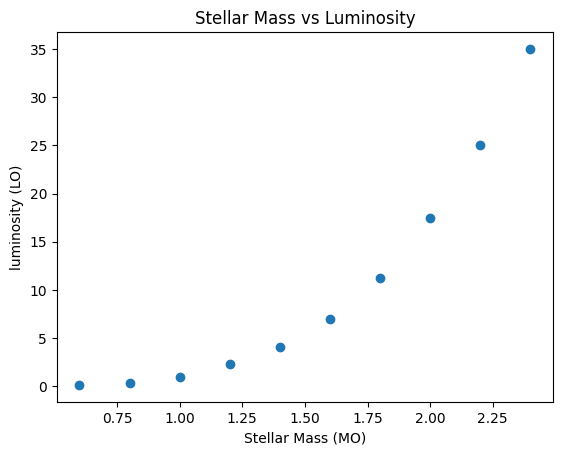

In [5]:
plt.figure()
plt.scatter(M, L,)
plt.xlabel("Stellar Mass (MO)")
plt.ylabel("luminosity (LO)")
plt.title("Stellar Mass vs Luminosity")
plt.show()

The graph shows an increasing relationship between mass and luminosity with a clear trend and non-linear growth.

### **Model and loss function**

In [3]:
def predict(M, w, b):
    return w * M + b


In [1]:
def mse_loss(M, L, w, b):
    n = len(M)
    L_hat = predict(M, w, b)
    return (1 / n) * np.sum((L - L_hat) ** 2)

### **Cost surface**


In [8]:
w_vals = np.linspace(0, 20, 50)
b_vals = np.linspace(-10, 10, 50)

W, B = np.meshgrid(w_vals, b_vals)
J = np.zeros(W.shape)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i, j] = mse_loss(M, L, W[i, j], B[i, j])


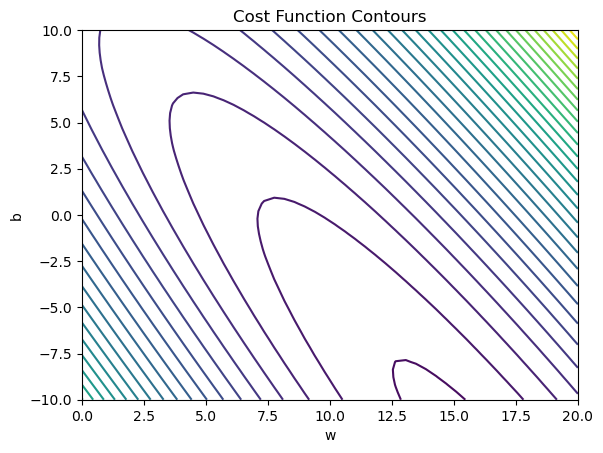

In [9]:
plt.figure()
plt.contour(W, B, J, levels=30)
plt.xlabel("w")
plt.ylabel("b")
plt.title("Cost Function Contours")
plt.show()


The minimum of the cost surface represents the optimal values ​​of w and b that minimize the prediction error.

### **Gradients**

The gradients of the mean squared error with respect to the parameters are:


$$
\frac{\partial J}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} M_i \left( L_i - \hat{L}_i \right)
$$

$$
\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \left( L_i - \hat{L}_i \right)
$$


In [11]:
def compute_gradients(x_list, y_list, w, b):
    """Compute dJ/dw and dJ/db using explicit loops."""
    m = len(x_list)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(m):
        y_hat = w * x_list[i] + b
        error = y_hat - y_list[i]
        sum_dw += error * x_list[i]
        sum_db += error

    dj_dw = sum_dw / m
    dj_db = sum_db / m
    return dj_dw, dj_db



### **Non-vectorized gradient descent**

In [12]:
def gradient_descent_non_vectorized(M, L, lr, num_iterations):
    w, b = 0.0, 0.0
    losses = []

    for _ in range(num_iterations):
        dw, db = compute_gradients(M, L, w, b)
        w -= lr * dw
        b -= lr * db
        losses.append(mse_loss(M, L, w, b))

    return w, b, losses


### **Vectorized Gradient Descent**

In [13]:
def gradient_descent_vectorized(M, L, lr, iterations):
    w, b = 0.0, 0.0
    n = len(M)
    losses = []

    for _ in range(iterations):
        L_hat = w * M + b
        dw = (-2 / n) * np.sum(M * (L - L_hat))
        db = (-2 / n) * np.sum(L - L_hat)

        w -= lr * dw
        b -= lr * db
        losses.append(mse_loss(M, L, w, b))

    return w, b, losses


### **Convergence**

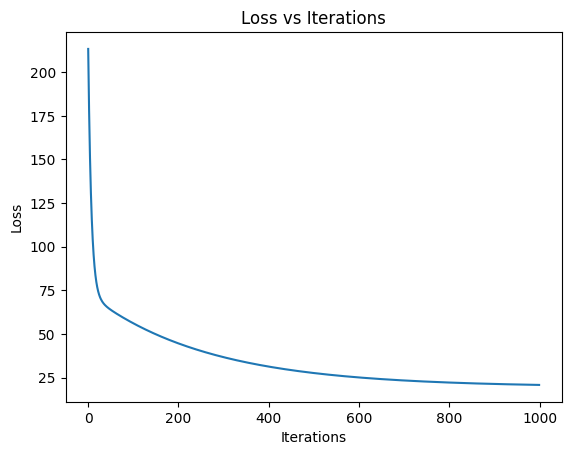

In [14]:
w, b, losses = gradient_descent_vectorized(M, L, lr=0.01, iterations=1000)

plt.figure()
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()

The loss decreases slightly over the iterations, indicating stable convergence of gradient descent.

### **Experiments**

In [15]:
learning_rates = [0.001, 0.01, 0.05]

for lr in learning_rates:
    w, b, losses = gradient_descent_vectorized(M, L, lr, 1000)
    print(f"LR={lr} -> w={w:.4f}, b={b:.4f}, loss={losses[-1]:.4f}")


LR=0.001 -> w=7.9563, b=0.0095, loss=56.2574
LR=0.01 -> w=16.2839, b=-13.7762, loss=20.7992
LR=0.05 -> w=18.1294, b=-16.8340, loss=19.5903


### **Final adjustment**

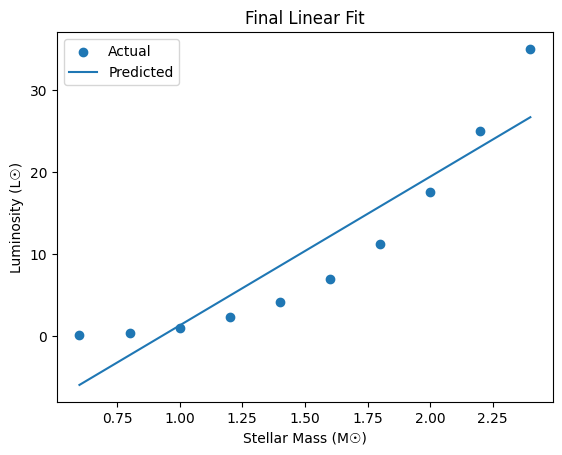

In [16]:
L_pred = predict(M, w, b)

plt.figure()
plt.scatter(M, L, label="Actual")
plt.plot(M, L_pred, label="Predicted")
plt.xlabel("Stellar Mass (M☉)")
plt.ylabel("Luminosity (L☉)")
plt.legend()
plt.title("Final Linear Fit")
plt.show()

The linear model underestimates the luminosity at higher masses, revealing systematic errors due to the nonlinear nature of the relationship.

### **Conceptual Questions**

- **Physical meaning of w:**  
The parameter w represents how much luminosity increases per unit increase in stellar mass.

- **Why is a linear model limited?**  
Stellar luminosity grows nonlinearly with mass, so a linear model cannot fully capture the rapid increase observed in more massive stars.
